In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LogisticRegression
import random
import warnings
from random import random
warnings.filterwarnings('ignore')
import seaborn as sns


df = pd.read_csv("C:/Users/bberg/Desktop/Programs/PFL_MMA/PFL_Rolling_DB.csv",index_col='Date',parse_dates=True)

df = df.fillna(0)

## Correlation

<IPython.core.display.Javascript object>

<AxesSubplot:>

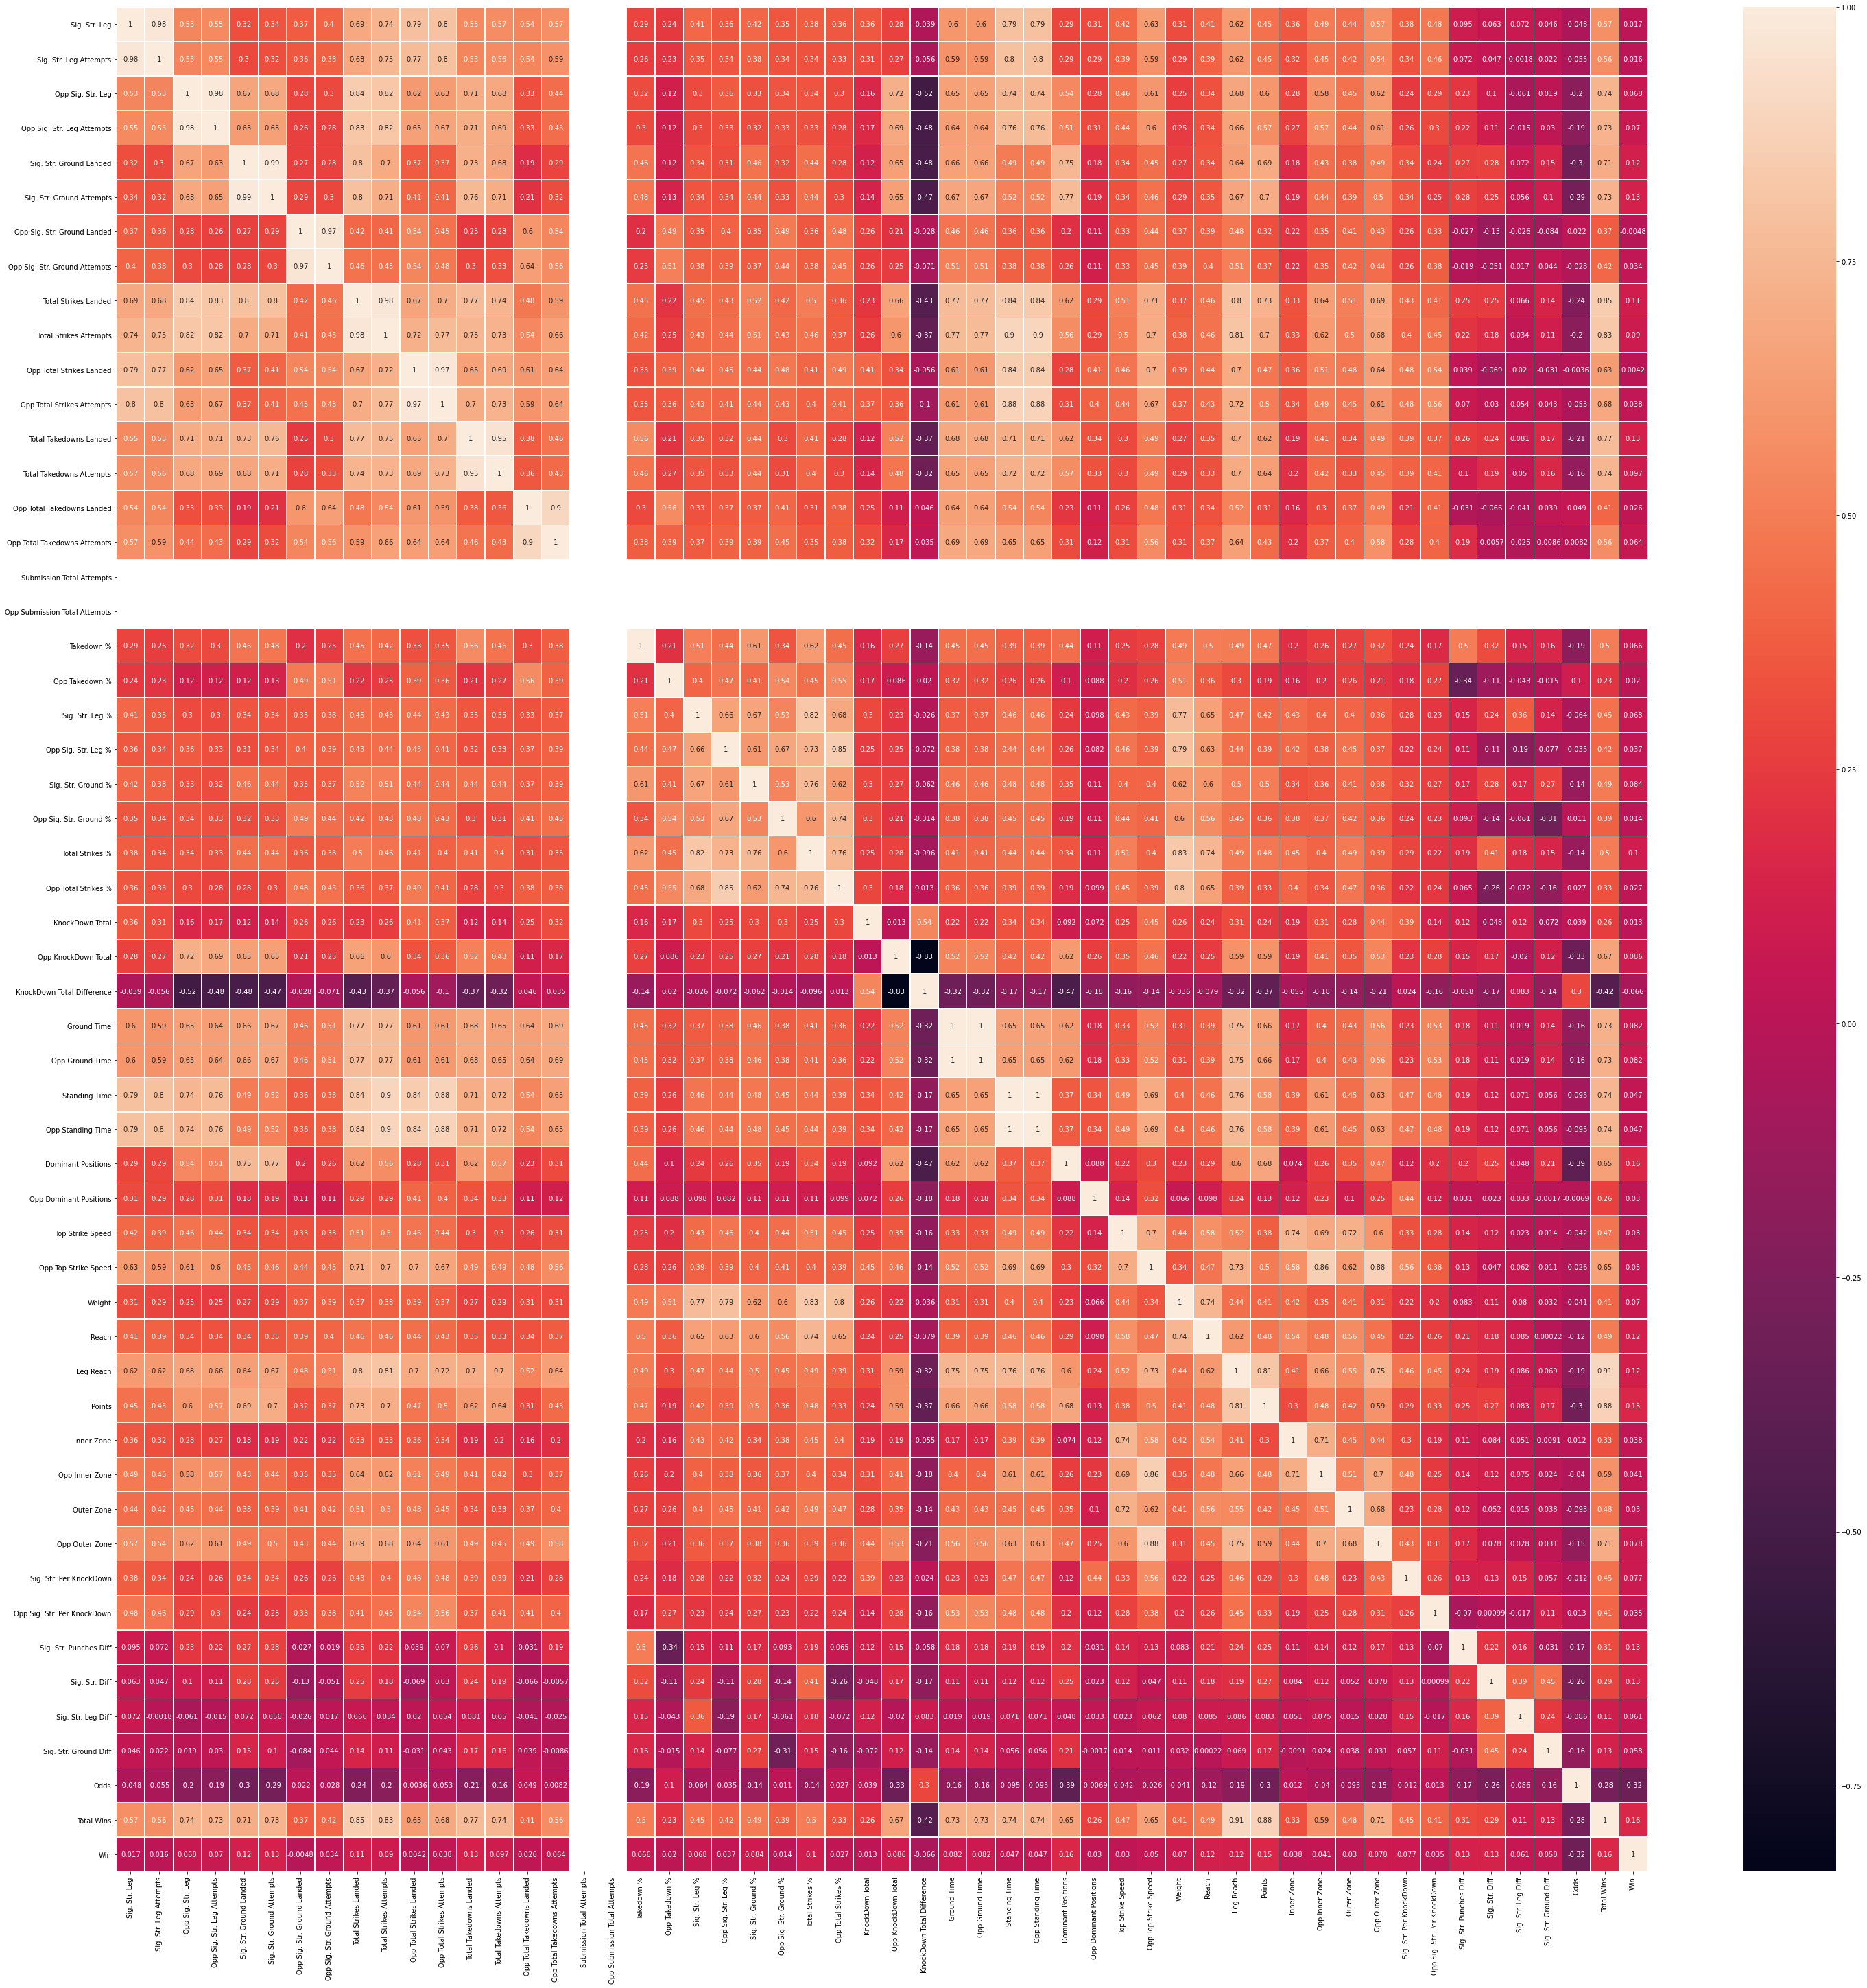

In [17]:

#ax = sns.heatmap(df.corr(), cmap="Greens",annot=True)
cor_matrix = df.corr().abs()

fig, ax = plt.subplots(figsize=(50,50))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [21]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(); print(to_drop)

df1 = df.drop(to_drop, axis=1)
print(); print(df1.head())

                               Sig. Str. Leg  Sig. Str. Leg Attempts  \
Sig. Str. Leg                            NaN                0.977895   
Sig. Str. Leg Attempts                   NaN                     NaN   
Opp Sig. Str. Leg                        NaN                     NaN   
Opp Sig. Str. Leg Attempts               NaN                     NaN   
Sig. Str. Ground Landed                  NaN                     NaN   
Sig. Str. Ground Attempts                NaN                     NaN   
Opp Sig. Str. Ground Landed              NaN                     NaN   
Opp Sig. Str. Ground Attempts            NaN                     NaN   
Total Strikes Landed                     NaN                     NaN   
Total Strikes Attempts                   NaN                     NaN   
Opp Total Strikes Landed                 NaN                     NaN   
Opp Total Strikes Attempts               NaN                     NaN   
Total Takedowns Landed                   NaN                    

<IPython.core.display.Javascript object>

<AxesSubplot:>

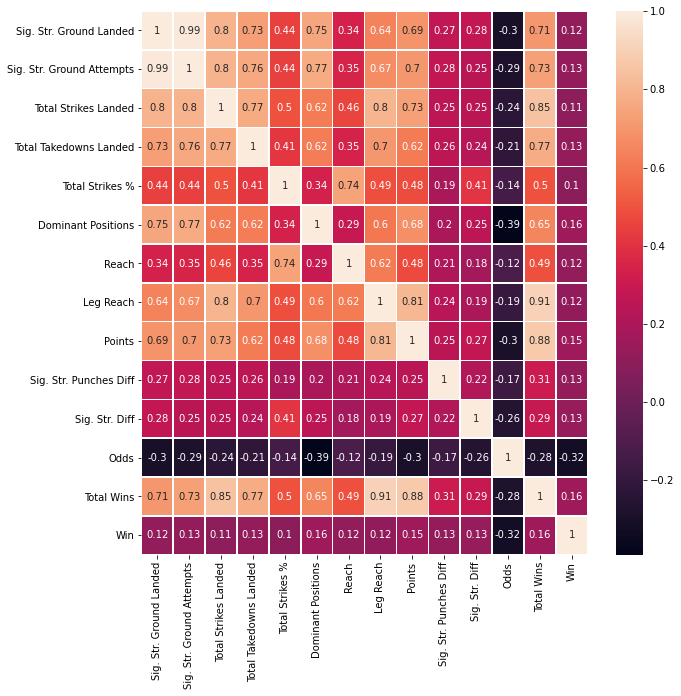

In [24]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df[statistical_list].corr(), annot=True, linewidths=.5, ax=ax)

## Statistical Significance

In [5]:
statistical_list = []


#Regression to find statistically significant columns for columns
from scipy.stats import pearsonr
def corrStats(column):
    return pearsonr(df['Win'],column)

predictors = df.drop(['Fighter','Height','Win'],axis=1)
for x in predictors.columns:
    var = corrStats(df[x])
    if var[1] <= 0.01:
        print(x,":",var[1])
        statistical_list.append(x)

Sig. Str. Ground Landed : 0.0014338432055135345
Sig. Str. Ground Attempts : 0.0012024254793710776
Total Strikes Landed : 0.005786383729122134
Total Takedowns Landed : 0.0009027497059453231
Total Strikes % : 0.008197739325794724
Dominant Positions : 3.247541601094928e-05
Reach : 0.0020989306301141164
Leg Reach : 0.0025488091405171252
Points : 7.952800376160851e-05
Sig. Str. Punches Diff : 0.001243942449304144
Sig. Str. Diff : 0.000687075893199883
Odds : 4.0737955266158824e-17
Total Wins : 3.0448312733329566e-05
Win : 0.0


## Predictive Power Score

[Text(0, 0, 'Fighter'),
 Text(1, 0, 'Opp Sig. Str. Leg %'),
 Text(2, 0, 'Odds'),
 Text(3, 0, 'Opp Total Strikes %'),
 Text(4, 0, 'Sig. Str. Leg %'),
 Text(5, 0, 'Opp Sig. Str. Ground Attempts'),
 Text(6, 0, 'Total Strikes %'),
 Text(7, 0, 'Sig. Str. Ground %'),
 Text(8, 0, 'Reach'),
 Text(9, 0, 'Opp Sig. Str. Ground Landed'),
 Text(10, 0, 'Total Wins'),
 Text(11, 0, 'Opp Sig. Str. Ground %'),
 Text(12, 0, 'Opp Total Strikes Attempts'),
 Text(13, 0, 'Opp Sig. Str. Leg'),
 Text(14, 0, 'Sig. Str. Leg Diff'),
 Text(15, 0, 'Takedown %'),
 Text(16, 0, 'Opp Total Strikes Landed'),
 Text(17, 0, 'Opp Takedown %'),
 Text(18, 0, 'Sig. Str. Ground Diff')]

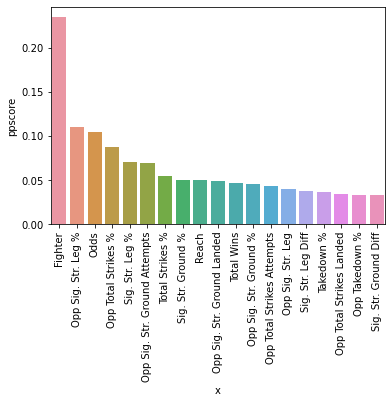

In [10]:
df = pd.read_csv("C:/Users/bberg/Desktop/Programs/PFL_MMA/PFL_Rolling_DB.csv",delimiter=',',index_col='Date',parse_dates=True)
df = df.replace(np.nan,0)
cause = pps.predictors(df,'Win')
#sns.heatmap(cause,xticklabels=cause.columns,yticklabels=cause.columns)
predictors_df = cause.loc[cause['ppscore'] > .03]
ax =sns.barplot(data=predictors_df,x="x",y='ppscore')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) 